In [2]:
import pandas as pd
import numpy as np
import math

DATA_PATH = "/Users/mvonebers/HUBBS-Lab/data/"

e4_data = pd.read_excel(DATA_PATH + "E4_TEST.xlsx")

e4_data.insert(0, "person", [0] * e4_data.shape[0])
e4_data.insert(1, "trial", [0] * e4_data.shape[0])

for i, row in e4_data.iterrows():
    e4_data.at[i, "person"] = int(e4_data.at[i, "id"][7:])
    e4_data.at[i, "trial"] = int(e4_data.at[i, "id"][5])
    
e4_data = e4_data.drop(columns=['id'])
e4_data = e4_data.rename(columns={"person": "id"})

change_data = pd.read_excel(DATA_PATH + "normalized_change.xlsx")

e4_data_results = pd.merge(e4_data, change_data, on='id')
e4_data_results

ids = set()
for i in range(e4_data.shape[0]):
    ids.add(e4_data.iloc[i, 0])
    
#print(len(ids))
e4_data_results

,id,trial,EDA_PPT,HR_PPT,TEMP_PPT,BVP_PPT,ACC_PPT,IBI_PPT,EDA_FREQ_PPT,EDA_AMP_PPT,Brief fear of Negative Evaluation,CAI Trait Dyadic Score,CAI Trait Full Score,CAI Trait Public Speaking Score,CAI Trait Small group Score,STAI Trait Score,CAI State Score,STAI State Score
0,4,1,0.205970,82.376250,31.404085,0.013278,64.812218,0.882853,7.181628,0.012059,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
1,4,2,0.206435,105.666378,31.331652,-0.132812,65.118669,0.859414,7.312119,0.012054,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
2,4,3,0.212655,75.010328,30.183614,-0.111220,64.876459,0.921917,7.685270,0.012726,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
3,4,4,0.191278,92.559115,29.766569,-0.046831,64.844329,1.171929,6.262231,0.010277,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
4,4,5,0.154794,79.935382,29.652207,0.029759,62.817997,1.187555,2.574713,0.010306,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,73,4,2.422543,78.467647,32.132378,-0.054789,65.853056,0.859414,8.862629,0.031206,0.344828,0.125000,0.233333,0.307692,0.222222,0.033333,0.178571,0.000000
156,73,5,0.545086,78.157361,33.548290,-0.043703,65.637811,0.655458,10.471204,0.026741,0.344828,0.125000,0.233333,0.307692,0.222222,0.033333,0.178571,0.000000
157,73,6,0.840680,84.307227,33.130568,-0.046631,65.968021,0.661489,15.984329,0.044909,0.344828,0.125000,0.233333,0.307692,0.222222,0.033333,0.178571,0.000000
158,73,7,0.997170,85.801776,32.511091,-0.058622,66.282949,0.953169,14.677686,0.052215,0.344828,0.125000,0.233333,0.307692,0.222222,0.033333,0.178571,0.000000


In [3]:
"""
Collect all possible slopes (trial 8 - trial 1)
"""
col = ["id", "trial", "EDA_PPT", "HR_PPT", "TEMP_PPT", "BVP_PPT", "ACC_PPT", 
           "IBI_PPT", "EDA_FREQ_PPT", "EDA_AMP_PPT", "Brief fear of Negative Evaluation",
           "CAI Trait Dyadic Score", "CAI Trait Full Score", "CAI Trait Public Speaking Score", 
           "CAI Trait Small group Score", "STAI Trait Score", "CAI State Score", "STAI State Score"]

slopes = pd.DataFrame(np.zeros((160, 18)), columns=col)
slopes = slopes.drop(["trial"], axis=1)
    
first = [0] * 8
for i in range(e4_data_results.shape[0]):
    if e4_data_results.iloc[i, 1] == 1:
        for j in range(2,10):
            first[j - 2] = e4_data_results.iloc[i, j]
    elif e4_data_results.iloc[i, 1] == 8:
        for j in range(2,10):
            #print(i, j)
            slopes.iloc[i, 0] = e4_data_results.iloc[i, 0]
            for k in range(9, 17):
                slopes.iloc[i, k] = e4_data_results.iloc[i, k + 1]
            if not math.isnan(e4_data_results.iloc[i, j]) and not math.isnan(first[j - 2]):
                slopes.iloc[i,j - 1] = e4_data_results.iloc[i, j] - first[j - 2] / 8
            else:
                slopes.iloc[i, j - 1] = 0
            
indexNames = slopes[ slopes['id'] == 0 ].index
slopes.drop(indexNames, inplace=True)

slopes.replace(0, np.NaN, inplace=True)
slopes

,id,EDA_PPT,HR_PPT,TEMP_PPT,BVP_PPT,ACC_PPT,IBI_PPT,EDA_FREQ_PPT,EDA_AMP_PPT,Brief fear of Negative Evaluation,CAI Trait Dyadic Score,CAI Trait Full Score,CAI Trait Public Speaking Score,CAI Trait Small group Score,STAI Trait Score,CAI State Score,STAI State Score
7,4.0,0.210164,60.664894,23.554450,0.037829,55.088773,0.697716,0.222919,0.006630,0.137931,0.153846,0.101695,0.120000,0.047619,-0.068182,-0.179487,-0.047619
15,5.0,0.444626,63.212511,25.405799,-0.055597,57.430220,0.614378,5.373883,0.073715,0.388889,0.166667,0.121212,0.100000,0.090909,0.025641,0.300000,0.090909
23,8.0,0.381983,72.302272,29.130058,-0.075223,57.577599,0.724642,3.257187,0.009408,0.089286,0.133333,0.128205,0.166667,0.083333,0.155172,0.187500,0.068182
31,20.0,-0.103883,85.766964,27.464529,-0.020019,56.391233,0.953169,14.729787,0.005928,0.272727,NaN,0.043478,0.125000,NaN,0.040000,-0.037037,-0.047619
39,21.0,-0.095482,78.963769,29.065740,0.017702,55.473673,0.445426,-0.779171,-0.045754,0.117647,0.312500,0.121212,-0.111111,NaN,0.114286,0.380952,0.512195
47,23.0,0.117118,73.496043,25.305126,-0.010327,55.741410,0.917453,4.563054,0.005931,-0.111111,NaN,0.066667,0.250000,-0.058824,0.100000,0.205128,0.230769
55,32.0,-0.088614,58.701567,28.561196,0.023527,55.746192,NaN,-1.675824,-0.004815,0.486486,0.375000,0.272727,0.470588,-0.181818,-0.214286,0.274510,0.125000
63,35.0,1.632557,77.821916,29.437755,0.073159,56.364890,0.651071,9.164304,0.158474,0.333333,-0.142857,NaN,NaN,0.125000,-0.068966,0.258065,0.050000
71,37.0,0.032494,80.075242,23.888878,0.084808,55.412272,NaN,1.518812,0.005851,-0.551724,0.176471,0.025641,-0.100000,-0.083333,-0.107143,0.302326,0.045455
79,41.0,0.277439,66.333266,27.803641,0.003895,57.982554,NaN,3.064312,0.007803,0.200000,0.217391,0.138462,0.136364,0.050000,NaN,0.263158,-0.555556


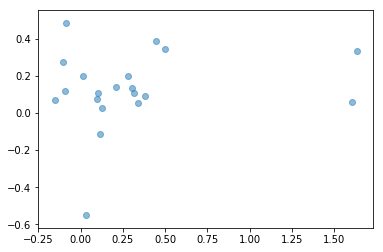

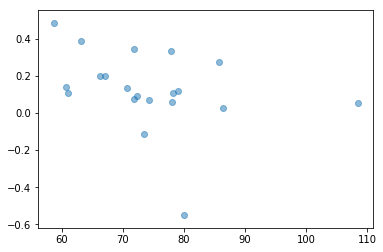

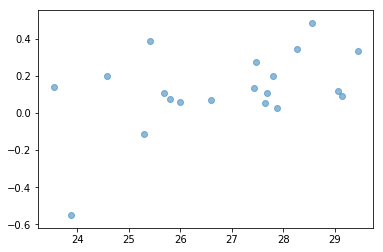

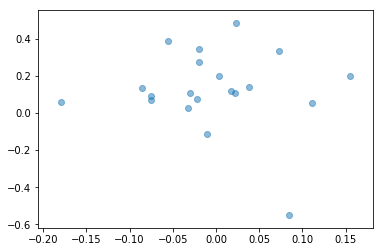

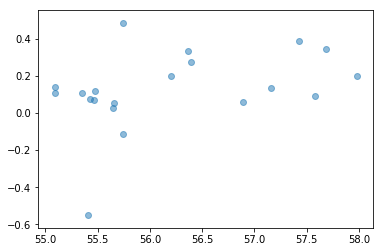

In [8]:
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(42)


N = 50
x_eda = slopes['EDA_PPT'].to_numpy(copy=True)
x_hr = slopes['HR_PPT'].to_numpy(copy=True)
x_temp = slopes['TEMP_PPT'].to_numpy(copy=True)
x_bvp = slopes['BVP_PPT'].to_numpy(copy=True)
x_acc = slopes['ACC_PPT'].to_numpy(copy=True)
x_ibi = slopes['IBI_PPT'].to_numpy(copy=True)
y = slopes['Brief fear of Negative Evaluation'].to_numpy(copy=True)

f1 = plt.figure(1)
plt.scatter(x_eda, y, alpha=0.5)
f2 = plt.figure(2)
plt.scatter(x_hr, y, alpha=0.5)
f3 = plt.figure(3)
plt.scatter(x_temp, y, alpha=0.5)
f4 = plt.figure(4)
plt.scatter(x_bvp, y, alpha=0.5)
f5 = plt.figure(5)
plt.scatter(x_acc, y, alpha=0.5)
f6 = plt.figure(6)
plt.scatter(x_i)

plt.show()

EDA_PPT
HR_PPT
TEMP_PPT
BVP_PPT
ACC_PPT
IBI_PPT
EDA_FREQ_PPT
EDA_AMP_PPT


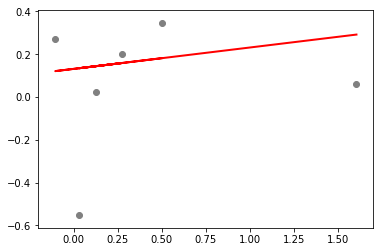

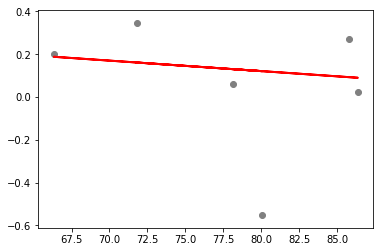

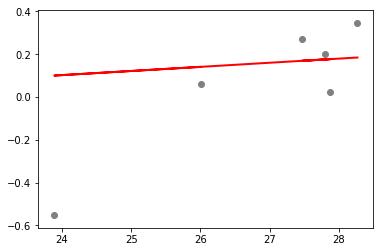

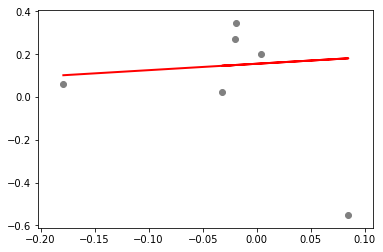

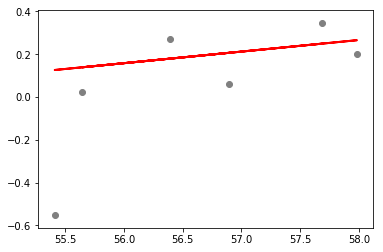

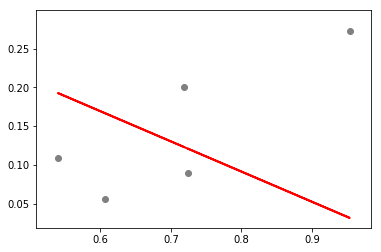

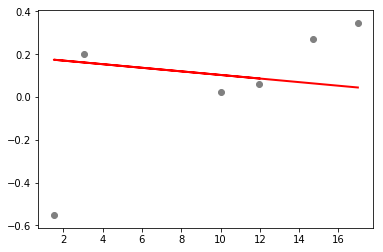

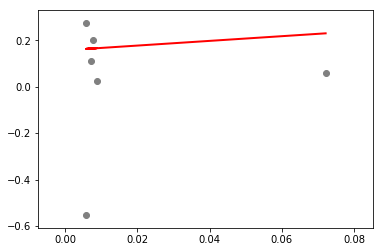

In [5]:
# start at 60-40 and if it's inconsistent, then slowly increase slowly towards 80-20 but don't go past that
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Y_BFNE = slopes['Brief fear of Negative Evaluation'].to_numpy(copy=True)

#EDA_pred = EDA_reg.predict(EDA_test.reshape(-1,1))


#plt.scatter(EDA_test, BFNE_test,  color='gray')
#plt.plot(EDA_test, EDA_pred, color='red', linewidth=2)
#plt.show()
k = 0

for col in slopes.columns:
    if col == 'id':
        continue
    if col == 'Brief fear of Negative Evaluation':
        break
    print(col)
    X_before = slopes[col].to_numpy(copy=True)
    Y_before = slopes['Brief fear of Negative Evaluation'].to_numpy(copy=True)
    X = np.array([])
    Y = np.array([])
    for i in range(len(X_before)):  # remove NaN from data
        if not math.isnan(X_before[i]) and not math.isnan(Y_before[i]):
            X = np.append(X, X_before[i])
            Y = np.append(Y, Y_before[i])
            
    #for j in range(50, 18, -2):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=50)
    reg = LinearRegression().fit(X_train.reshape(-1, 1), Y_train)
    #print("Testing with",j,"%", reg.score(X_test.reshape(-1, 1), Y_test))
    pred = reg.predict(X_test.reshape(-1,1))
    f1 = plt.figure(k)
    plt.scatter(X_test, Y_test,  color='gray')
    plt.plot(X_test, pred, color='red', linewidth=2)
    
    k += 1
            
plt.show()
# data augmentation?
# maybe ask for the individual values for BFNE

# cross validation with 10%
# collect predicted values for all tests and compute correlation vs those and actual values
# trials as seperate features
# feed all 8 trials as feature


EDA_PPT
Testing with 9 % -0.06317250435296518
HR_PPT
Testing with 9 % -0.11695754742480191
TEMP_PPT
Testing with 9 % 0.2660683594722396
BVP_PPT
Testing with 9 % -0.04221612057193713
ACC_PPT
Testing with 9 % 0.05396870059497406
IBI_PPT
Testing with 9 % -0.1441223530689546
EDA_FREQ_PPT
Testing with 9 % -0.05133818401453527
EDA_AMP_PPT
Testing with 9 % -0.0817001348335824


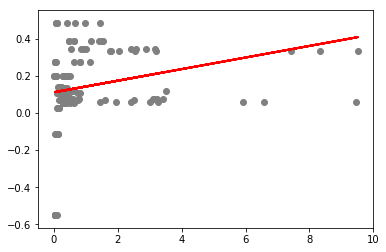

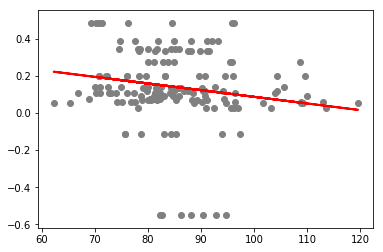

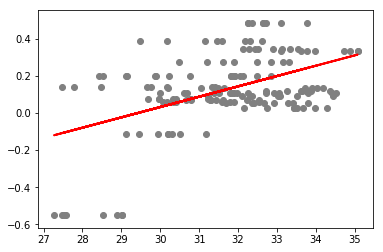

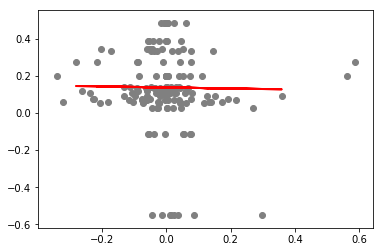

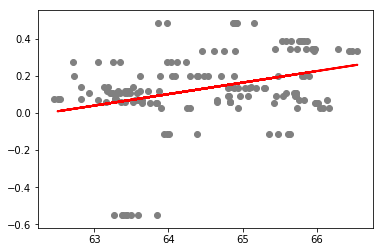

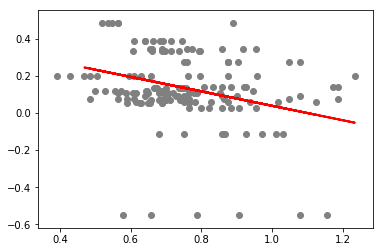

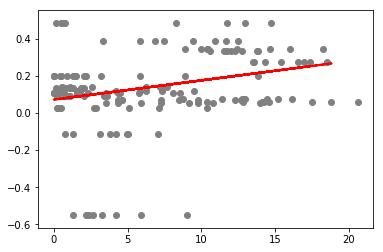

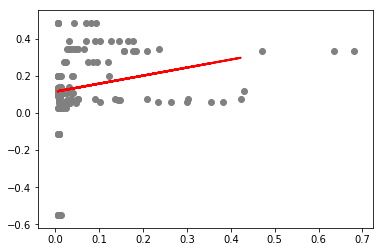

In [6]:
# Trying again with just the raw data instead of the slopes...not sure how that's gonna go
k = 0

for col in e4_data_results.columns:
    if col == 'id' or col == 'trial':
        continue
    if col == 'Brief fear of Negative Evaluation':
        break
    print(col)
    X_before = e4_data_results[col].to_numpy(copy=True)
    Y_before = e4_data_results['Brief fear of Negative Evaluation'].to_numpy(copy=True)
    X = np.array([])
    Y = np.array([])
    for i in range(len(X_before)):  # remove NaN from data
        if not math.isnan(X_before[i]) and not math.isnan(Y_before[i]):
            X = np.append(X, X_before[i])
            Y = np.append(Y, Y_before[i])
            
    #for j in range(50, 10, -2):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=25)
    reg = LinearRegression().fit(X_train.reshape(-1, 1), Y_train.reshape(-1, 1))
    print("Testing with",j,"%", reg.score(X_test.reshape(-1, 1), Y_test.reshape(-1, 1)))
    pred = reg.predict(X_test.reshape(-1,1))
    f1 = plt.figure(k)
    plt.scatter(X, Y,  color='gray')
    plt.plot(X_test, pred, color='red', linewidth=2)
    
    k += 1
    
plt.show()

0.2660683594722396


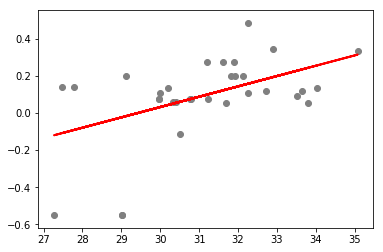

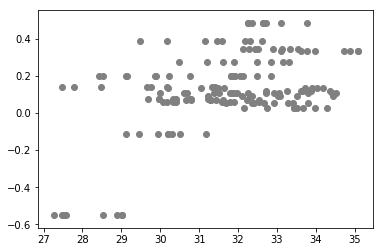

In [7]:
X_before = e4_data_results['TEMP_PPT'].to_numpy(copy=True)
Y_before = e4_data_results['Brief fear of Negative Evaluation'].to_numpy(copy=True)

X = np.array([])
Y = np.array([])
for i in range(len(X_before)):  # remove NaN from data
    if not math.isnan(X_before[i]) and not math.isnan(Y_before[i]):
        X = np.append(X, X_before[i])
        Y = np.append(Y, Y_before[i])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=25)
reg = LinearRegression().fit(X_train.reshape(-1, 1), Y_train)

pred = reg.predict(X_test.reshape(-1,1))

print(reg.score(X_test.reshape(-1, 1), Y_test))

f1 = plt.figure(1)
plt.scatter(X_test, Y_test,  color='gray')
plt.plot(X_test, pred, color='red', linewidth=2) # plotting test points with regression line

f2 = plt.figure(2)
plt.scatter(X, Y, color='gray') # plotting all points
 
plt.show()